In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [6]:
csv_path = r'D:\dataset\final sheet - Copy.csv'
dataset = pd.read_csv(csv_path)

In [7]:
dataset.shape

(398, 13)

In [8]:
input_data = dataset.drop(columns = ["UCS"])
output_data = dataset['UCS']
X =  minmax_scale(input_data, feature_range=(0,1))
y = minmax_scale(output_data, feature_range=(0,1))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)

-0.20017205034669988
[ 0.12419555  0.28098077  0.21695013 -0.08308449 -0.24165153 -0.10466536
 -0.28864511 -0.07277854 -0.10773548 -4.78840308  2.74302088  4.98741641]


In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09090775897587741
Mean Squared Error: 0.015714929153873625
Root Mean Squared Error: 0.1253592005154533


In [14]:
y_pred_full = regressor.predict(X)

In [15]:
from sklearn.metrics import r2_score
print('correlation fatcor',r2_score(y_test, y_pred))

correlation fatcor 0.6183668640716873


Feature: 0, Score: 0.00372
Feature: 1, Score: 0.01426
Feature: 2, Score: 0.00029
Feature: 3, Score: 0.00263
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.00188
Feature: 6, Score: 0.01477
Feature: 7, Score: 0.00185
Feature: 8, Score: 0.00089
Feature: 9, Score: 0.43661
Feature: 10, Score: 0.11897
Feature: 11, Score: 0.40402


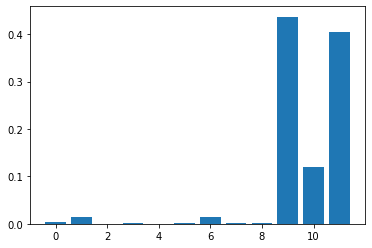

In [16]:
importance = np.abs(regressor.coef_)
std = np.array([6.805,11.52,0.3,7.187,0.126,4.07,11.618,5.763,1.881,20.704,9.848,18.394])
importance = importance*std
importance = importance/(importance.sum())
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()